In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('creditcard.csv')

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
df.isnull().sum().max()

np.int64(0)

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

Synthetic Minority Over-sampling Technique


In [18]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [19]:
from sklearn.model_selection import train_test_split

Using stratification to make sure that train and test sets have same proportion of both classes


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [21]:
from sklearn.ensemble import RandomForestClassifier

Using a model that utilizes weighted training. Setting class weights to balanced will ensure that the classes will be weighted inversely proportional to how frequently they appear in the data


In [22]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9998241387193781


In [27]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 1.0


In [28]:
f1 = f1_score(y_test, y_pred)
print(f"f1 score: {f1}")

f1 score: 0.9998241696411302


In [29]:
cm = confusion_matrix(y_test, y_pred)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

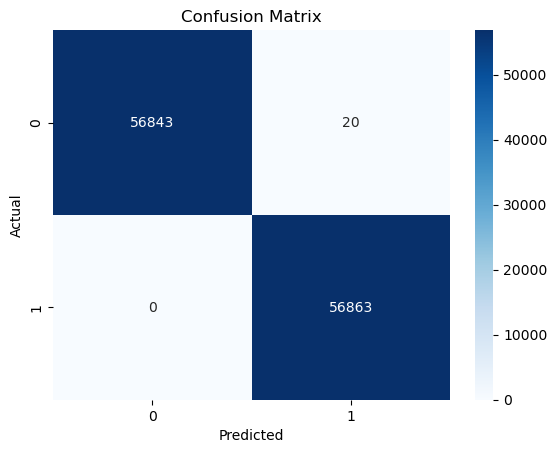

In [31]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()